# Exercise 07: ML Basics

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from numpy.typing import NDArray

## Task 1: Logistic Regression
In this task, we want to implement Logistic Regression with Stochastic Gradient Descent.

__a)__ Implement the `predict_proba` function in the `LogisticRegression` class below. Your function should return the output of a logistic regression classifier according to the current assignments of weights $\mathbf{w}$, i.e.,
$$
expit(\mathbf{w}^T\mathbf{x})
$$
You can assume that model weights are stored in a variable `self.w`.

__b)__ Implement the `predict` function in the `LogisticRegression` class below. The prediction should return class `1` if the classifier output is above 0.5, otherwise `0`

__c)__ Implement the `fit` function to learn the model parameters `w` with stochastic gradient descent. You don't need to add a bias weight/feature. Store the learned parameters in a variable `self.w`. We use epochs as stopping criterion: 1 epoch means iterating over all instances once.

In [ ]:
class LogisticRegression():
    '''Logistic Regression Classifier.'''

    def fit(self, x: NDArray[NDArray[float]], y: NDArray[int], eta: float=0.1, epochs: int=10):
        '''
        :param x: 2D numpy array where each row is an instance
        :param y: 1D numpy array with target classes for instances in x
        :param eta: learning rate, default is 0.1
        :param epochs: fixed number of epochs as stopping criterion, default is 10
        '''

        #x = self.add_bias(x)
        num_points = x.shape[0] # number of instances 有几组数据
        dim = x.shape[1] # number of features 每组数据里有几个数据
        w = np.ones(dim) # init weight vector with ones 每个数据初始化一个wi
        #self.w = np.random.rand(dim) # alternative init in range [0,1]
        for j in range(epochs):
            idx = np.arange(num_points)
            # np.random.shuffle(idx) # shuffle training data to iterate in different order in each epoch
            for i in idx:
                predict = expit(np.dot(w,x[i])) # predict the value of the chosen example based on the current hypothesis
                error = predict - y[i]   # calculate the error
                w = w - eta*error*x[i]   # update the weight vector
        self.w = w

    def predict_proba(self, x):
        #x = self.add_bias(x)
        return expit(np.dot(x,self.w))

    def predict(self, x):
        return np.where(self.predict_proba(x) > 0.5,1,0)

    def add_bias(self, x):
        bias = np.ones((x.shape[0],1)) # add the weight as the first column?
        x = np.concatenate((x,bias),axis=1) #?
        return x

In [ ]:
# one instance:
X = np.array([[2.0, 3.0],
              [1.0, -1.0],
              [-1.0, 2.0],
              [-2.0, -1.0]])
y = np.array([1, 0, 1, 0])
#2.0/3.0/...: features
#4: instances

__d)__ Fit your Logistic Regression classifier to the dataset below. Then plot the data points again, coloring it by the predictions of your classifier. How well can it classify this data set?

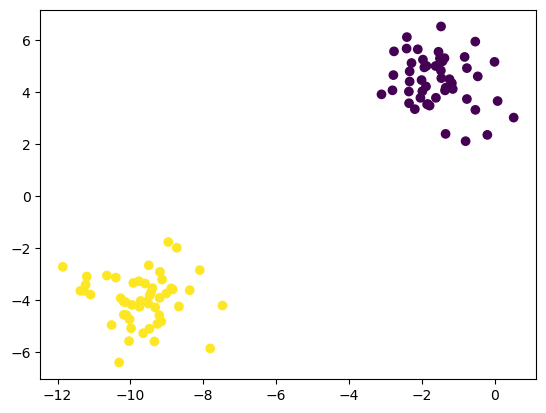

In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles

x,y = make_blobs(centers=2,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y);

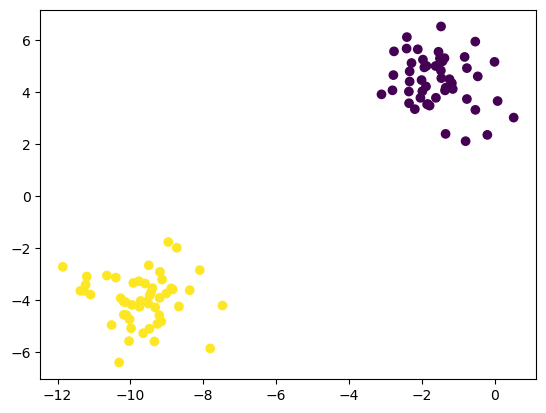

In [ ]:
clf = LogisticRegression()
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=clf.predict(x));

__e)__ Again fit your model to the data given below and color the classes by the predictions of your logistic regression classifier. Could we get a better classification by, e.g., tuning the learning rate or training for more epochs?

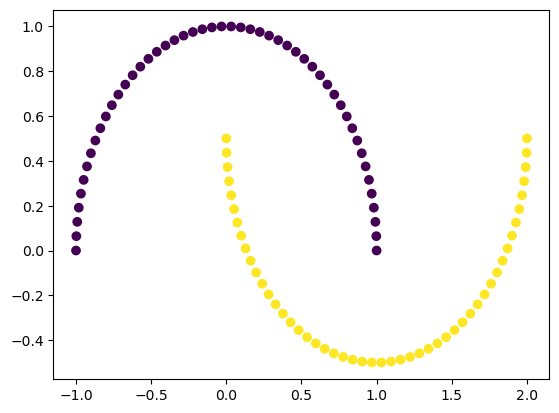

In [ ]:
x,y = make_moons(random_state=1)
plt.scatter(x[:,0],x[:,1],c=y);

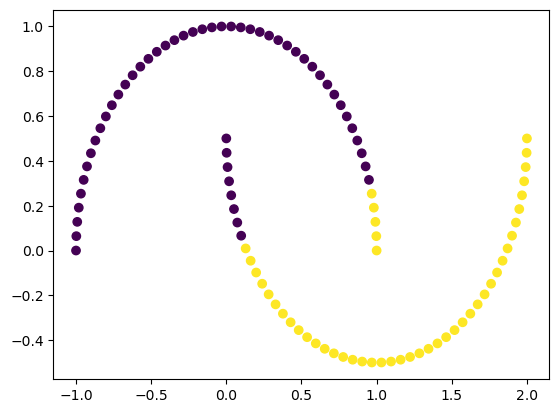

In [ ]:
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=clf.predict(x));

__e)__ Could we get a better classification by, e.g., tuning the learning rate or training for more epochs?

Maybe slightly better, but it's impossible to get close-to-perfect accuracy. Logistic Regression can only provide a linear separation of the classes, i.e., in 2D, the decision boundary is a straight line. No matter how we adjust the line to improve upon one class, we will decrease correct predictions in the other class with the exact same amount of improvement.

In [ ]:
# Helper function to plot a decision boundary. From https://dennybritz.com/posts/wildml/implementing-a-neural-network-from-scratch/
def plot_decision_boundary(X,pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

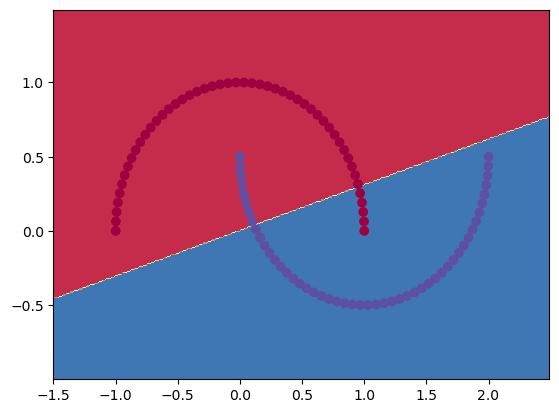

In [ ]:
plot_decision_boundary(x,clf.predict)

In [ ]:
from sklearn.metrics import accuracy_score as acc
acc(y, clf.predict(x))

0.87

What we could try is feature expansion: Project the original features into some (higher-dimensional) space, where they classes might be linearly separable.

In [ ]:
def feature_expansion(x):
    x3 = x[:,0] + x[:,1] # additional feature as the sum of (x1,x2)
    x4 = x[:,0] * x[:,1] ** 4 # additional feature as the product of (x1,x1) to the power of 4
    x5= x[:,0] ** 2 # x1 squared
    x6 = x[:,0] ** 3
    x7= x[:,1] ** 7
    x8= expit(x[:,0])
    x9= expit(x[:,1])
    x = np.column_stack((x,x3,x4,x5,x6,x7))
    return x

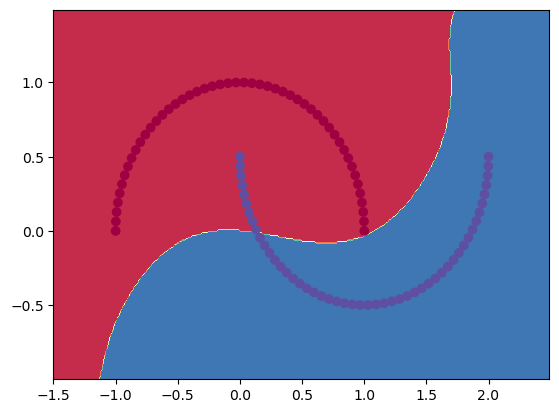

In [ ]:
clf.fit(feature_expansion(x),y)
plot_decision_boundary(x,lambda v:clf.predict(feature_expansion(v)))

In [ ]:
acc(y, clf.predict(feature_expansion(x)))

0.91

Comparison with scikit learn implementation

In [ ]:
from sklearn.linear_model import LogisticRegression

0.86

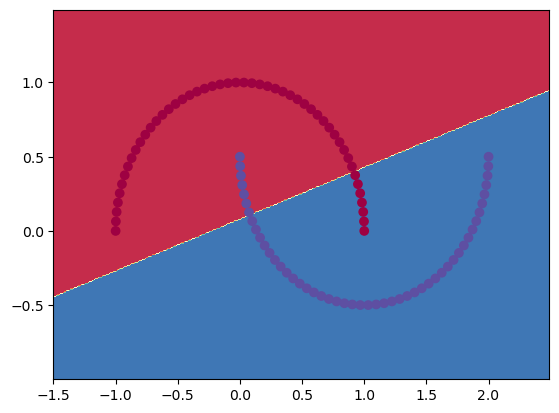

In [ ]:
clf = LogisticRegression()
clf.fit(x,y)
plot_decision_boundary(x, clf.predict)
acc(y,clf.predict(x))

## Other classifiers
### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

1.0


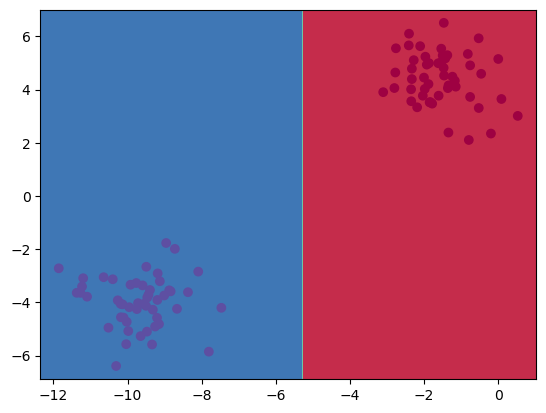

In [ ]:
x,y = make_blobs(centers=2,random_state=1)
#x,y = make_moons(random_state=1)
#x = np.array([(x,x) for x in range(50)] + [(x,x+3) for x in range(50)])
#y = np.array([0 for _ in range(50)] + [1 for _ in range(50)])
clf = DecisionTreeClassifier()
clf.fit(x,y)
plot_decision_boundary(x, clf.predict)
print(acc(y,clf.predict(x)))

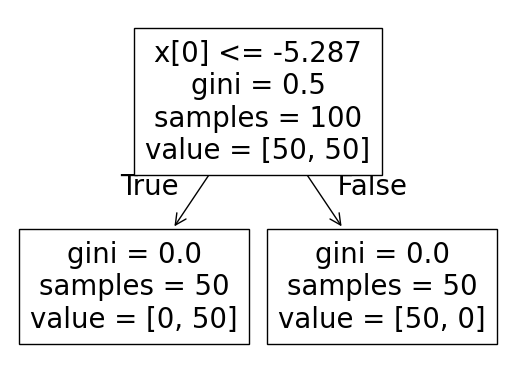

In [ ]:
plot_tree(clf);

### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

1.0


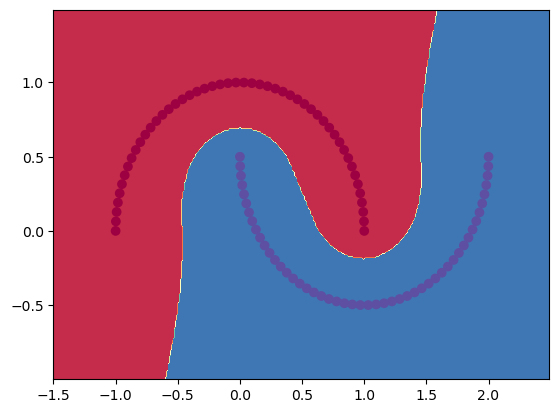

In [ ]:
x,y = make_blobs(centers=2,random_state=1)
x,y = make_moons(random_state=1)
#x = np.array([(x,x) for x in range(50)] + [(x,x+3) for x in range(50)])
#y = np.array([0 for _ in range(50)] + [1 for _ in range(50)])
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x,y)
plot_decision_boundary(x, clf.predict)
print(acc(y,clf.predict(x)))

calculate for 100 distances and choose the min to decide the class

### SVM

0.86


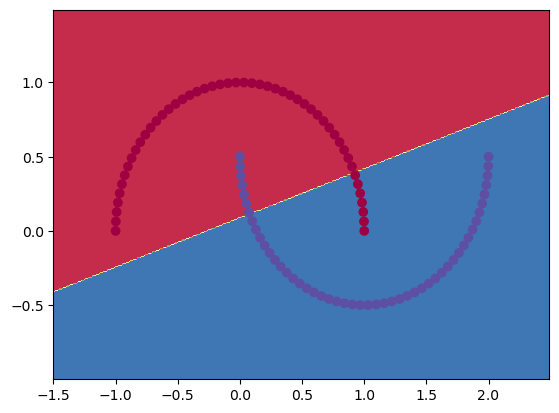

In [ ]:
from sklearn.svm import SVC

#x,y = make_blobs(centers=2,random_state=1)
x,y = make_moons(random_state=1)
# x = np.array([(x,x) for x in range(50)] + [(x,x+3) for x in range(50)])
# y = np.array([0 for _ in range(50)] + [1 for _ in range(50)])
clf = SVC(kernel='linear')
#clf = SVC(kernel='rbf')
#clf = SVC(kernel='poly', degree = 5)
clf.fit(x,y)
plot_decision_boundary(x, clf.predict)
print(acc(y,clf.predict(x)))